# Analyzing Weather Data for Climate Change Trends: Data Analysis

In [4]:
# Import libraries and packages
import pandas as pd
import hvplot.pandas
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import json
from dotenv import load_dotenv
import nasdaqdatalink

# New Libraries
import folium

## 50 Year Atlantic Hurricane Data

In [12]:
# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "atl_hurricane_50_df.csv")
atl_hurricane_50_df = pd.read_csv(df_path, index_col = "date")
atl_hurricane_50_df.index = pd.to_datetime(atl_hurricane_50_df.index)

# pull the atl_hurricane_50_df and consolidate in 10 year periods
df_copy = atl_hurricane_50_df.copy()
df_copy['decade'] = df_copy.index.year // 10 * 10

# groupby decade and category of storm
occurrences_by_decade = df_copy.groupby(['decade','category']).size().to_frame('size').reset_index()
occurrences_by_decade.sort_values("size", ascending = False, inplace = True)

#occurrences_by_decade = occurrences_by_decade.to_frame()
display(occurrences_by_decade)


,decade,category,size
20,2000,Tropical Storm,68
27,2010,Tropical Storm,63
13,1990,Tropical Storm,45
33,2020,Tropical Storm,36
14,2000,Category 1,31
21,2010,Category 1,26
28,2020,Category 1,20
7,1990,Category 1,19
19,2000,Tropical Depression,17
16,2000,Category 3,14


In [17]:
# Plot the hurricane frequency data
occurrences_by_decade.hvplot.bar(
    x="decade",
    y="size",
    color="category",
    alpha=0.8,
    xlabel="Decade",
    ylabel="Size",
    label="Hurricane Category Occurences By Decade",
    rot=90,
    width=1000,
    height = 500
).opts(
    cmap='Category20'
)

:Bars   [decade]   (size,category)

### Choropleth Map of Count of Atlantic Hurricane Landings in the Last 50 Years

In [ ]:
# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "atl_hurricane_freq_df.csv")
atl_hurricane_freq_df = pd.read_csv(df_path)

# Plot the hurricane frequency data by country
geo_countries_url = (
    "https://github.com/datasets/geo-countries/raw/cd9e0635901eac20294a57ee3b3ce0684d5e3f1a/data/countries.geojson"
)

folium_hurricane_map = folium.Map(location = (50, -50), zoom_start = 3, tiles = "cartodb positron")
folium.GeoJson(geo_countries_url).add_to(folium_hurricane_map)

folium.Choropleth(
    geo_data = geo_countries_url,
    data = atl_hurricane_freq_df,
    columns = ["country_code", "landings_count"],
    key_on = "feature.properties.ISO_A2",
    fill_color = 'YlGnBu',
    legend_name = "Hurricane Landings in the Last 50 Years"
).add_to(folium_hurricane_map)

folium_hurricane_map

Based on the figure above, the country with the most Atlantic hurricane landings in the last 50 years is the United States.

In [ ]:
# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "atl_hurricane_freq_us_df.csv")
atl_hurricane_freq_us_df = pd.read_csv(df_path)

# Plot the hurricane frequency data by US State
geo_us_states_url = (
    "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson"
)

folium_hurricane_us_map = folium.Map(location = (35, -80), zoom_start = 5, tiles = "cartodb positron")
folium.GeoJson(geo_us_states_url).add_to(folium_hurricane_us_map)

folium.Choropleth(
    geo_data = geo_us_states_url,
    data = atl_hurricane_freq_us_df,
    columns = ["state", "landings_count"],
    key_on = "feature.properties.name",
    fill_color = 'Blues',
    legend_name = "Hurricane Landings in the Last 50 Years"
).add_to(folium_hurricane_us_map)

folium_hurricane_us_map

Based on the figure above, the US state with the most Atlantic hurricane landings in the last 50 years is Florida.

### References

[geo-countries GeoJson Data](https://github.com/datasets/geo-countries)

[Python Folium and Choropleth](https://realpython.com/python-folium-web-maps-from-data/#create-and-style-a-map)

## 25 Year Drought Data for the United States of America

In [ ]:
# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "drought_percent_per_state_df.csv")
drought_percent_per_state_df = pd.read_csv(df_path, index_col = "StateAbbreviation")

# Plot the drought abnormaly dry data choropleth
folium_dry_map = folium.Map(location = (50, -110), zoom_start = 3, tiles = "cartodb positron")
folium.GeoJson(geo_us_states_url).add_to(folium_dry_map)

folium.Choropleth(
    geo_data = geo_us_states_url,
    data = drought_percent_per_state_df,
    columns = [drought_percent_per_state_df.index, "abnormaly_dry"],
    key_on = "feature.properties.postal",
    fill_color = 'YlOrRd',
    legend_name = "25 Year Average Abnormaly Dry Percent"
).add_to(folium_dry_map)

folium_dry_map

Based on the figure above, the states that have the highest average abnormaly dry percent are states in the southwest, with the highest being Nevada, Utah, Arizona and New Mexico.

In [14]:
# Plot the drought data choropleth
folium_drought_map = folium.Map(location = (50, -110), zoom_start = 3, tiles = "cartodb positron")
folium.GeoJson(geo_us_states_url).add_to(folium_drought_map)

folium.Choropleth(
    geo_data = geo_us_states_url,
    data = drought_percent_per_state_df,
    columns = [drought_percent_per_state_df.index, "extreme_drought"],
    key_on = "feature.properties.postal",
    fill_color = 'YlOrBr',
    legend_name = "25 Year Average Extreme Drought Percent"
).add_to(folium_drought_map)

folium_drought_map

NameError: name 'geo_us_states_url' is not defined

Similarly, the states that have the highest extreme drought percentage are the Southwestern States and California.

In [13]:
# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "drought_percent_per_year_df.csv")
drought_percent_per_year_df = pd.read_csv(df_path, index_col = "year")

# Plot annaul average drought percent over the last 25 years by state
drought_percent_per_year_plot = drought_percent_per_year_df.hvplot.line(
    x = "year",
    y = ["abnormaly_dry", "severe_drought", "extreme_drought"],
    label = "25-Year Annual Average Drought Percent",
    xlabel = "Year",
    ylabel = "Percent",
    rot = 90
).opts(
    yformatter = '%.0f', 
    width = 1000,
    height = 500
)

drought_percent_per_year_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

Based on the figure above, there does not seem to be any noticable trends in the drought percentages througout the years.

## 50 Year Temperature Data for British Columbia

### Average Temperature by Season 

In [7]:
# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "temp_by_season_df.csv")
temp_by_season_df = pd.read_csv(df_path, index_col = ["Decade", "Season"])

# Plot the temperature variations by season each decade
temp_by_season_plot = temp_by_season_df.hvplot(
    x="Season", 
    y=["Average Temp (°C)"],
    by="Decade",
    alpha = 0.8,
    kind="bar", 
    title="Temperature Variations by Season in last 5 Decades",
    rot = 90,
    width=1000, 
    height=600 
)

temp_by_season_plot

:Bars   [Season,Decade]   (Average Temp (°C))

By examining the figure above, the average temperature for each season is increasing each decade.

### Wildfires in British Columbia in Last 10 Years and Finding if there is a Correlation between Rise in Temperature and Number of Wildfires

#### Correlation between Temperature Rise and Wildfires From 2012-2022

In [8]:
# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "wildfires_temp_bc.csv")
wildfires_temp_bc = pd.read_csv(df_path, index_col = "Year")

# Determine the correlation between the Temperature and Wildfires
correlation = wildfires_temp_bc['Max Temp (°C)'].corr(wildfires_temp_bc["Total Fires"])

# Show the correlation
correlation

0.6715448895950225

Rise in temperature and wildfires show a moderate correlation of 0.67. 

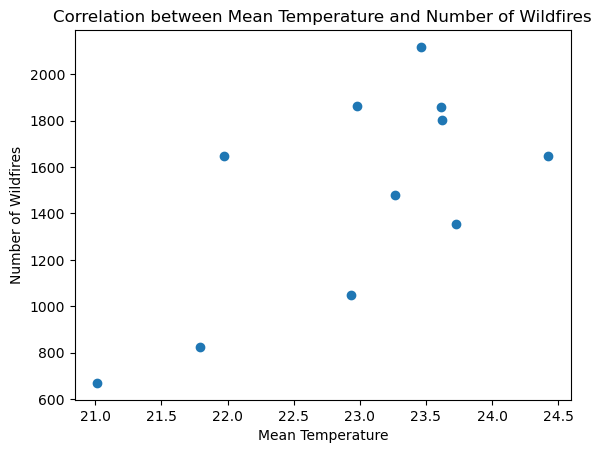

In [9]:
# PLot the correlation data
temperature = wildfires_temp_bc["Max Temp (°C)"]
wildfires = wildfires_temp_bc["Total Fires"]

plt.scatter(temperature, wildfires)
plt.xlabel("Mean Temperature")
plt.ylabel("Number of Wildfires")
plt.title("Correlation between Mean Temperature and Number of Wildfires")
plt.show()

The plot above shows a strong positive correlation between the average summer temperature and number of wildfires.

# Extreme Weather on Stocks and Commodities

### Hurricane Impact on Florida Gas Prices

In [10]:
# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "florida_gas_df.csv")
florida_gas_df = pd.read_csv(df_path, index_col = "Week")
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "combined_florida_df.csv")
combined_florida_df = pd.read_csv(df_path, index_col = "date")

# Match datetime index
florida_gas_df.index = pd.to_datetime(florida_gas_df.index)
combined_florida_df.index = pd.to_datetime(combined_florida_df.index)

# Plot Florida Weekly Gas Prices
florida_gas_plot = florida_gas_df.hvplot.line(
    label = "Florida Gasoline Price",
    xlabel = "Date",
    ylabel = "Price Per Gallon (USD)",
    color = "orange"
).opts(
    yformatter = '%.0f'
)

# Plot Florida Hurricane Events
florida_hurricane_plot = combined_florida_df.hvplot.points(
    x = "date",
    y = "price_per_gallon",
    by = "hurricane_name",
    label = "Florida Hurricane Encounters",
    xlabel = "Date",
    ylabel = "Price Per Gallon (USD)"
).opts(
    yformatter = '%.0f'
)

# Plot Combined Florida Hurricane Events and Gas Prices
combined_florida_plot = florida_gas_plot * florida_hurricane_plot

combined_florida_plot.opts(
    title = "10 Year Hurricane Encounters and Gas Prices in Florida",
    width = 1000,
    height = 400
)

combined_florida_plot

:Overlay
   .Curve.Florida_Gasoline_Price           :Curve   [Week]   (price_per_gallon)
   .NdOverlay.Florida_Hurricane_Encounters :NdOverlay   [hurricane_name]
      :Points   [date,price_per_gallon]

The plot above shows that hurricanes usually land on peak high and low prices, meaning they are a potential factor for driving the price up or down. Since hurricanes cause less people to go out, the demand for gasoline decreases, increasing supply, and thus decreasing the price. Hurricanes can also disrupt the supply chain, decreasing the supply of gasoline, and thus causing the price to increase.

## Is There a Correlation Between Wildfires and Stock Prices ?

In [11]:
# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "stock_wildfire_df.csv")
stock_wildfire_df = pd.read_csv(df_path, index_col = "Year")

# Determine the correlation between the stock closing price and wildfires
correlation = stock_wildfire_df["Total Fires"].corr(stock_wildfire_df["Average Summer Closing"])

correlation

0.36396739139130496

Total Fires and Change in Stock Price show a low positive correlation of 0.36

In [12]:
# Plot the correlation
correlation_plot = stock_wildfire_df.hvplot.scatter(
    x='Total Fires',
    y='Average Summer Closing',
    title='Correlation between Total Fires and Stock Price',
    xlabel='Total Fires',
    ylabel='Average Stock Price'
)

correlation_plot

:Scatter   [Total Fires]   (Average Summer Closing)

The plot above visualized the low positive correlation between the total fires and change in stock price.

## Commodities VS Hurricanes, Drought and Wildfires

In [13]:
# Configure Nasdaq API

# Load .env environment variables
load_dotenv()

# Set Nasdaq API key
nasdaq_api_key = os.getenv('NASDAQ_API_KEY')

# Create the Nasdaq API object
nasdaqdatalink.ApiConfig.api_key = nasdaq_api_key

In [14]:
# Get commodity data

# Create dictionary for API codes
commodities_code = {
    "Metal" : {
        "Aluminum" : "ODA/PALUM_USD",
        "Copper" : "ODA/PCOPP_USD",
        "Iron Ore" : "ODA/PIORECR_USD",
        "Lead" : "ODA/PLEAD_USD",
        "Nickel" : "ODA/PNICK_USD",
        "Tin" : "ODA/PTIN_USD",
        "Zinc" : "ODA/PZINC_USD"    
    },
    "Grain" : {
        "Barley, Western Canada" : "ODA/PBARL_USD",
        "Rice, Thailand (ODA)" : "ODA/PRICENPQ_USD",
        "Wheat, Gulf of Mexico" : "ODA/PWHEAMT_USD"
    },
    "Farms and Fishery" : {
        "Cattle, Beef" : "ODA/PBEEF_USD",
        "Cattle, Hides, Chicago" : "ODA/PHIDE_USD",
        "Poultry, Chicken, Georgia" : "ODA/PPOULT_USD",
        "Pork, Pork, Chicago" : "ODA/PPORK_USD",
        "Fats, Lamb" : "ODA/PLAMB_USD",
        "Wool" : "ODA/PWOOLC_USD",
        "Salmon" : "ODA/PSALM_USD",
        "Shrimp" : "ODA/PSHRI_USD",
        "Fishmeal" : "ODA/PFISH_USD"
    },
    "Crude Oil and Gasoline" : {
        "Dubai Crude Oil" : "ODA/POILDUB_USD",
        "Blended Crude Oil" :  "ODA/POILAPSP_USD",
        "WTI Crude Oil" : "ODA/POILWTI_USD",
        "Brent Crude Oil" : "ODA/POILBRE_USD",
        "US Midgrade Conventional Gas" : "FRED/GASMIDCOVW",
        "Conventional Gasolines: New York Harbor, Regular" : "FRED/DGASNYH",
        "US Regular Conventional Gas" : "FRED/GASREGCOVW",
        "Conventional Gasolines: U.S. Gulf Coast, Regular" : "FRED/DGASUSGULF",
        "Consumer Index for All Urban Consumers: Gasoline (all types)" : "FRED/CUUR0000SETB01",
        "US All Grades Conventional Gas" : "FRED/GASALLCOVW",
        "US Premium Conventional Gas" : "FRED/GASPRMCOVW"
    },
    "Natural Gas" : {
        "Germany Natural Gas" : "ODA/PNGASEU_USD",
        "Henry Hub Natural Gas" : "ODA/PNGASUS_USD",
        "Japan Natural Gas" : "ODA/PNGASJP_USD"
    },
    "Coal" : {
        "Coal" : "ODA/PCOALAU_USD"
    },
    "Agriculture Softs" : {
        "Arabica Coffee" : "ODA/PCOFFOTM_USD",
        "Robusta Coffee" : "ODA/PCOFFROB_USD",
        "Cocoa beans" : "ODA/PCOCO_USD",
        "Tea" : "ODA/PTEA_USD",
        "US Imports Sugar" : "ODA/PSUGAUSA_USD"
    },
    "Fruits and Nuts" : {
        "Groundnuts (Peanuts)" : "ODA/PGNUTS_USD",
        "Oranges" : "ODA/PORANG_USD",
        "Bananas" : "ODA/PBANSOP_USD"
    },
    "Vegetable Oil" : {
        "Rapeseed Oil" : "ODA/PROIL_USD",
        "Sunflower Oil" : "ODA/PSUNO_USD",
        "Olive Oil" : "ODA/POLVOIL_USD",
        "Palm Oil" : "ODA/PPOIL_USD"
    },
    "Forestry" : {
        "Hard Logs" : "ODA/PLOGSK_USD",
        "Soft Logs" : "ODA/PLOGORE_USD",
        "Soft Sawnwood" : "ODA/PSAWORE_USD",
        "Hard Sawnwood" : "ODA/PSAWMAL_USD",
        "Rubber" : "ODA/PRUBB_USD"
    },
    "Textiles and Fibres" : {
        "Cotton" : "ODA/PCOTTIND_USD"
    }
}

# Create Dictionaries for menu structure
commodities_type = {
    "1" : "Metal", 
    "2" : "Grain", 
    "3" : "Farms and Fishery", 
    "4" : "Crude Oil and Gasoline", 
    "5" : "Natural Gas", 
    "6" : "Coal", 
    "7" : "Agriculture Softs", 
    "8" : "Fruits and Nuts", 
    "9" : "Vegetable Oil", 
    "10" : "Forestry", 
    "11" : "Textiles and Fibres"
}

commodities_metal = {
    "1" : "Aluminum", 
    "2" : "Copper", 
    "3" : "Iron Ore", 
    "4" : "Lead", 
    "5" : "Nickel", 
    "6" : "Tin", 
    "7" : "Zinc"
}

commodities_grain = {
    "1" : "Barley, Western Canada", 
    "2" : "Rice, Thailand (ODA)", 
    "3" : "Wheat, Gulf of Mexico"
}

commodities_farm_fish = {
    "1" : "Cattle, Beef", 
    "2" : "Cattle, Hides, Chicago", 
    "3" : "Poultry, Chicken, Georgia", 
    "4" : "Pork, Pork, Chicago", 
    "5" : "Fats, Lamb", 
    "6" : "Wool", 
    "7" : "Salmon", 
    "8" : "Shrimp", 
    "9" : "Fishmeal"
}

commodities_oil_gas = {
    "1" : "Dubai Crude Oil", 
    "2" : "Blended Crude Oil", 
    "3" : "WTI Crude Oil", 
    "4" : "Brent Crude Oil", 
    "5" : "US Midgrade Conventional Gas", 
    "6" : "Conventional Gasolines: New York Harbor, Regular", 
    "7" : "US Regular Conventional Gas", 
    "8" : "Conventional Gasolines: U.S. Gulf Coast, Regular", 
    "9" : "Consumer Index for All Urban Consumers: Gasoline (all types)", 
    "10" : "US All Grades Conventional Gas", 
    "11" : "US Premium Conventional Gas"
}

commodities_gas = {
    "1" : "Germany Natural Gas", 
    "2" : "Henry Hub Natural Gas", 
    "3" : "Japan Natural Gas"
}

commodities_coal = {
    "1" : "Coal" 
}

commodities_agriculture = {
    "1" : "Arabica Coffee", 
    "2" : "Robusta Coffee", 
    "3" : "Cocoa beans", 
    "4" : "Tea", 
    "5" : "US Imports Sugar"
}

commodities_fruit_nut = {
    "1" : "Groundnuts (Peanuts)", 
    "2" : "Oranges", 
    "3" : "Bananas"
}

commodities_vegetable_oil = {
    "1" : "Rapeseed Oil", 
    "2" : "Sunflower Oil", 
    "3" : "Olive Oil", 
    "4" : "Palm Oil"
}

commodities_forestry = {
    "1" : "Hard Logs", 
    "2" : "Soft Logs", 
    "3" : "Soft Sawnwood", 
    "4" : "Hard Sawnwood", 
    "5" : "Rubber"
}

commodities_textiles = {
    "1" : "Cotton"
}

commodities_subtype = {
    "1" : commodities_metal, 
    "2" : commodities_grain, 
    "3" : commodities_farm_fish, 
    "4" : commodities_oil_gas, 
    "5" : commodities_gas, 
    "6" : commodities_coal, 
    "7" : commodities_agriculture, 
    "8" : commodities_fruit_nut, 
    "9" : commodities_vegetable_oil, 
    "10" : commodities_forestry, 
    "11" : commodities_textiles
}

commodities_type_str = json.dumps(commodities_type, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_metal_str = json.dumps(commodities_metal, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_grain_str = json.dumps(commodities_grain, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_farm_fish_str = json.dumps(commodities_farm_fish, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_oil_gas_str = json.dumps(commodities_oil_gas, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_gas_str = json.dumps(commodities_gas, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_coal_str = json.dumps(commodities_coal, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_agriculture_str = json.dumps(commodities_agriculture, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_fruit_nut_str = json.dumps(commodities_fruit_nut, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_vegetable_oil_str = json.dumps(commodities_vegetable_oil, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_forestry_str = json.dumps(commodities_forestry, indent = 0).replace("{", "").replace("}", "").strip("\n")
commodities_textiles_str = json.dumps(commodities_textiles, indent = 0).replace("{", "").replace("}", "").strip("\n")

commodities_subtype_str = {
    "1" : commodities_metal_str, 
    "2" : commodities_grain_str, 
    "3" : commodities_farm_fish_str, 
    "4" : commodities_oil_gas_str, 
    "5" : commodities_gas_str, 
    "6" : commodities_coal_str, 
    "7" : commodities_agriculture_str, 
    "8" : commodities_fruit_nut_str, 
    "9" : commodities_vegetable_oil_str, 
    "10" : commodities_forestry_str, 
    "11" : commodities_textiles_str
}

In [15]:
# Ask user to choose commodity to visualize
while True:
    print(commodities_type_str)
    commodity_type = input("\nPlease Choose a Commodity Type.")
    
    if commodity_type in commodities_type:     
        while True:
            print("\n" + commodities_subtype_str[commodity_type])
            commodity_subtype = input("\nPlease Choose a Commodity or \"0\" to go back.")
            
            if commodity_subtype in commodities_subtype[commodity_type]:
                break
            elif commodity_subtype == "0":
                break
            else:
                print("\n**Invalid Input! Please Try Again.**")
        
        if commodity_subtype == "0":    
            print("\n")
            pass
        else:
            break
    else:
        print("\n**Invalid Input! Please Try Again.**")

print(f"The Chosen Commodity is {commodities_subtype[commodity_type][commodity_subtype]}")

# Get the data for the chosen commodity
commodity_data_df = nasdaqdatalink.get(commodities_code[commodities_type[commodity_type]][commodities_subtype[commodity_type][commodity_subtype]])

# Calculate average annual price
commodity_data_df["year"] = commodity_data_df.index.year
annual_commodity_data_df = pd.DataFrame(commodity_data_df.groupby("year").mean())

# Plot commodity price
commodity_data_plot = annual_commodity_data_df.hvplot.line(
    label = f"{commodities_subtype[commodity_type][commodity_subtype]} Average Annual Price",
    xlabel = "Year",
    ylabel = "Average Annual Price",
    color = "purple"
).opts(
    yformatter = '%.0f'
)

# Read the cleaned data from CSV into a DataFrame
df_path = os.path.join(os.getcwd(), "Resources", "DataFrames", "atl_hurricane_country_df.csv")
atl_hurricane_country_df = pd.read_csv(df_path, index_col = "date")
atl_hurricane_country_df.index = pd.to_datetime(atl_hurricane_country_df.index)

# Get the frequency of hurricanes each year
annual_atl_hurricane_df = atl_hurricane_country_df.copy()

# Extract the year from the date index
annual_atl_hurricane_df["year"] = annual_atl_hurricane_df.index.year

# Group by country and name to determine unique landings of each hurricane
annual_atl_hurricane_df = pd.DataFrame(annual_atl_hurricane_df.groupby(["year", "country_code", "name"]).nunique())
annual_atl_hurricane_df = pd.DataFrame(annual_atl_hurricane_df.groupby(["year"])["country"].count())

# Rename the year columns
annual_atl_hurricane_df.rename(columns = {"country": "landings_count"}, inplace = True)
annual_commodity_data_df.rename(columns = {"Value": "average_price"}, inplace = True)

# Plot Atlantic Hurricane encounters
annual_atl_hurricane_plot = annual_atl_hurricane_df.hvplot.line(
    x = "year",
    y = "landings_count",
    label = "Annual Hurricane Encounters",
    xlabel = "Year",
    ylabel = "Landings Count",
    color = "blue"
).opts(
    yformatter = '%.0f'
)

# Plot commodity price with Atlantic Hurricane Events
combined_commodity_hurricane_plot = commodity_data_plot * annual_atl_hurricane_plot

combined_commodity_hurricane_plot.opts(
    title = f"50-Year Hurricane Encounters vs {commodities_subtype[commodity_type][commodity_subtype]} Average Annual Price",
    ylabel = "Average Annual Price / Landings Count",
    width = 1000,
    height = 400
)

display(combined_commodity_hurricane_plot)

# Combine the commodity and hurricane DataFrames
commodity_hurricane_df = pd.concat([annual_commodity_data_df, annual_atl_hurricane_df], axis = "columns", join = "inner")

# Determine the correlation between the commodity price and hurricanes
commodity_hurricane_correlation = commodity_hurricane_df["landings_count"].corr(commodity_hurricane_df["average_price"])
print(f"Correlation between Hurricane Encounters and Average Annual Price of {commodities_subtype[commodity_type][commodity_subtype]} is :", commodity_hurricane_correlation)
print("\n\n")

# --------------------

# Plot US drought data
annual_drought_data_plot = drought_percent_per_year_df.hvplot.line(
    x = "year",
    label = "Annual Average Drought in the US",
    xlabel = "Year",
    ylabel = "Percent"
).opts(
    yformatter = '%.0f'
)

# Plot commodity price with US Drought Percent
combined_commodity_drought_plot = commodity_data_plot * annual_drought_data_plot

combined_commodity_drought_plot.opts(
    title = f"25-Year US Drought Data vs {commodities_subtype[commodity_type][commodity_subtype]} Average Annual Price",
    ylabel = "Average Annual Price / Percent",
    width = 1000,
    height = 400
)

display(combined_commodity_drought_plot)

# Combine the commodity and drought DataFrames
commodity_drought_df = pd.concat([annual_commodity_data_df, drought_percent_per_year_df], axis = "columns", join = "inner")

# Determine the correlation between the commodity price and US droughts
commodity_drought_corr_df = commodity_drought_df.corr()

# Display the correlation between each percent and commodity
print(f"Correlation between Abnormaly Dry Percent and Average Annual Price of {commodities_subtype[commodity_type][commodity_subtype]} is :", commodity_drought_corr_df.iloc[1,0])
print(f"Correlation between Severe Drought Percent and Average Annual Price of {commodities_subtype[commodity_type][commodity_subtype]} is :", commodity_drought_corr_df.iloc[2,0])
print(f"Correlation between Extreme Drought Percent and Average Annual Price of {commodities_subtype[commodity_type][commodity_subtype]} is :", commodity_drought_corr_df.iloc[3,0])
print("\n\n")

# --------------------

# Get 10-year annual BC wildfire data
annual_wildfire_df = wildfires_temp_bc.copy()
annual_wildfire_df.drop(columns = ["Max Temp (°C)"])

# Plot BC wildfire data
annual_wildfire_plot = annual_wildfire_df.hvplot.line(
    x = "Year",
    y = "Total Fires",
    label = "Total BC Wildfires",
    xlabel = "Year",
    ylabel = "Wildfires Count",
    color = "red"
).opts(
    yformatter = '%.0f'
)

# Plot commodity price with BC wildfires
combined_commodity_wildfire_plot = commodity_data_plot * annual_wildfire_plot

combined_commodity_wildfire_plot.opts(
    title = f"10-Year BC Wildfire Data vs {commodities_subtype[commodity_type][commodity_subtype]} Average Annual Price",
    ylabel = "Average Annual Price / Wildfires Count",
    width = 1000,
    height = 400
)

display(combined_commodity_wildfire_plot)

# Combine the commodity and wildfire DataFrames
commodity_wildfire_df = pd.concat([annual_commodity_data_df, annual_wildfire_df], axis = "columns", join = "inner")

# Determine the correlation between the commodity price and wildfires
commodity_wildfire_correlation = commodity_wildfire_df["Total Fires"].corr(commodity_wildfire_df["average_price"])
print(f"Correlation between Total Wildfires and Average Annual Price of {commodities_subtype[commodity_type][commodity_subtype]} is :", commodity_wildfire_correlation)

"1": "Metal",
"2": "Grain",
"3": "Farms and Fishery",
"4": "Crude Oil and Gasoline",
"5": "Natural Gas",
"6": "Coal",
"7": "Agriculture Softs",
"8": "Fruits and Nuts",
"9": "Vegetable Oil",
"10": "Forestry",
"11": "Textiles and Fibres"



Please Choose a Commodity Type. 1



"1": "Aluminum",
"2": "Copper",
"3": "Iron Ore",
"4": "Lead",
"5": "Nickel",
"6": "Tin",
"7": "Zinc"



Please Choose a Commodity or "0" to go back. 1


The Chosen Commodity is Aluminum


:Overlay
   .Curve.Aluminum_Average_Annual_Price :Curve   [year]   (Value)
   .Curve.Annual_Hurricane_Encounters   :Curve   [year]   (landings_count)

Correlation between Hurricane Encounters and Average Annual Price of Aluminum is : 0.36235169446567955





:Overlay
   .Curve.Aluminum_Average_Annual_Price        :Curve   [year]   (Value)
   .NdOverlay.Annual_Average_Drought_in_the_US :NdOverlay   [Variable]
      :Curve   [year]   (value)

Correlation between Abnormaly Dry Percent and Average Annual Price of Aluminum is : 0.1803315298812296
Correlation between Severe Drought Percent and Average Annual Price of Aluminum is : 0.021674587729810367
Correlation between Extreme Drought Percent and Average Annual Price of Aluminum is : 0.04780385463121939





:Overlay
   .Curve.Aluminum_Average_Annual_Price :Curve   [year]   (Value)
   .Curve.Total_BC_Wildfires            :Curve   [Year]   (Total Fires)

Correlation between Total Wildfires and Average Annual Price of Aluminum is : 0.4692242979333278


### References

[Nasdaq Using API for Commodity Data](https://blog.data.nasdaq.com/api-for-commodity-data)